### GRIP-The Sparks Foundation 

## TASK 2:Prediction Using UnSupervised ML

## Author-Akshat Jain

### Problem Statement:

#### Using the IRIS dataset predict the optimum no. of clusters using K-means Clustering and represent it visually.

### Importing Libraries

In [298]:
import numpy as np                   
import pandas as pd                 
import seaborn as sns       
import matplotlib.pyplot as plt 
%matplotlib inline  

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier

import warnings                  # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")

### Loading dataset

In [299]:
iris = pd.read_csv('Iris.csv')
print('....Data loaded....')
iris.head(10)

....Data loaded....


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


### Data Description 

In [300]:
print(iris.shape)

(150, 6)


In [301]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [302]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [303]:
print(iris.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


#### Thus 50 samples of each species is taken.

In [304]:
iris.groupby('Species').agg(["min","max","std","mean"])

Id                       SepalLengthCm                 \
                 min  max       std   mean           min  max       std   
Species                                                                   
Iris-setosa        1   50  14.57738   25.5           4.3  5.8  0.352490   
Iris-versicolor   51  100  14.57738   75.5           4.9  7.0  0.516171   
Iris-virginica   101  150  14.57738  125.5           4.9  7.9  0.635880   

                       SepalWidthCm                       PetalLengthCm       \
                  mean          min  max       std   mean           min  max   
Species                                                                        
Iris-setosa      5.006          2.3  4.4  0.381024  3.418           1.0  1.9   
Iris-versicolor  5.936          2.0  3.4  0.313798  2.770           3.0  5.1   
Iris-virginica   6.588          2.2  3.8  0.322497  2.974           4.5  6.9   

                                 PetalWidthCm                        
                      std   mean          min  max       std   mean  
Species                                                              
Iris-setosa      0.173511  1.464          0.1  0.6  0.107210  0.244  
Iris-versicolor  0.469911  4.260          1.0  1.8  0.197753  1.326  
Iris-virginica   0.551895  5.552          1.4  2.5  0.274650  2.026

###  Checking for  null values

In [305]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [306]:
iris.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### No null or NAN values are found hence we can proceed further with data.

### check and remove duplicates 

In [307]:
iris[iris.duplicated(keep=False)]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


## Data Visualization

#### Here we will analyze our data by plotting them using various functions and then gaining meaningful insights from it.

In [308]:
# removing Id column
new_data = iris[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
print(new_data.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2


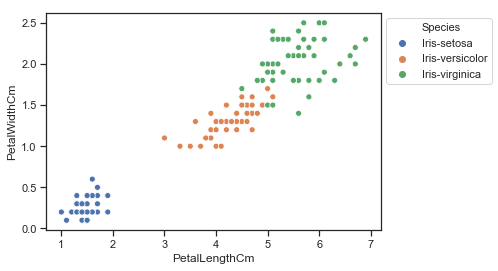

In [309]:
## scatter plot
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm',
                hue='Species', data=iris )
  
plt.legend(bbox_to_anchor=(1, 1), loc=2)
  
plt.show()

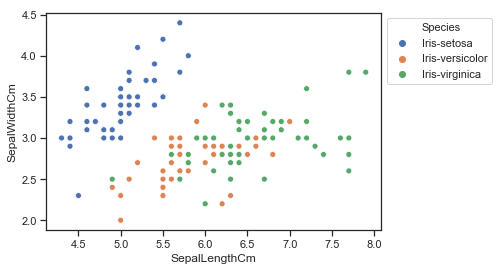

In [310]:

sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm',
                hue='Species', data=iris, )
  
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
  
plt.show()

### Multivariate Analysis

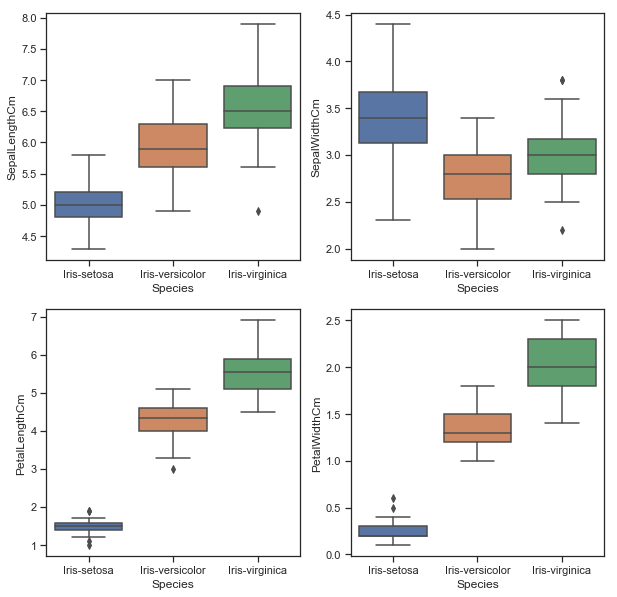

In [311]:
# Boxplots
def graph(y):
    sns.boxplot(x="Species", y=y, data=iris)
  
plt.figure(figsize=(10,10))
      
# Adding the subplot at the specified
plt.subplot(221)
graph('SepalLengthCm')
  
plt.subplot(222)
graph('SepalWidthCm')
  
plt.subplot(223)
graph('PetalLengthCm')
  
plt.subplot(224)
graph('PetalWidthCm')
  
plt.show()

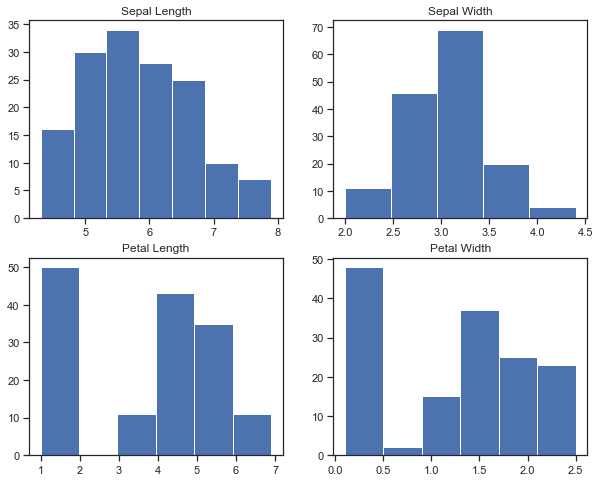

In [312]:
fig, axes = plt.subplots(2, 2, figsize=(10,8))
  
axes[0,0].set_title("Sepal Length")
axes[0,0].hist(iris['SepalLengthCm'], bins=7)
  
axes[0,1].set_title("Sepal Width")
axes[0,1].hist(iris['SepalWidthCm'], bins=5);
  
axes[1,0].set_title("Petal Length")
axes[1,0].hist(iris['PetalLengthCm'], bins=6);
  
axes[1,1].set_title("Petal Width")
axes[1,1].hist(iris['PetalWidthCm'], bins=6);

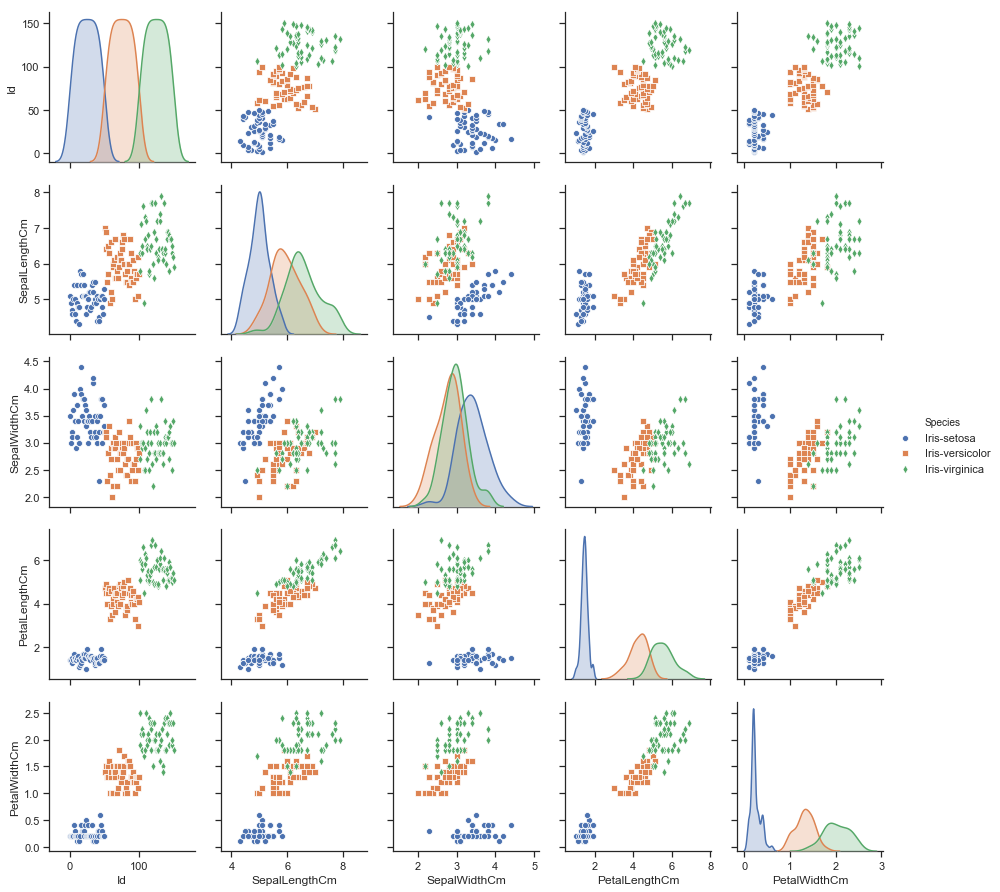

In [313]:
# pairplot   
sns.pairplot(iris, hue="Species", markers=["o","s","d"])
plt.show()


### From above pairplot we can observe that Iris-setosa make a distinct cluster in every parameter while the other two species are often overlapping.

### Correlation  using Heat map

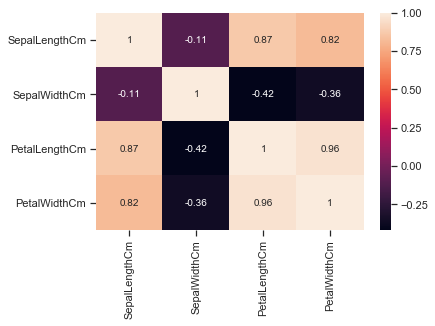

In [314]:
sns.heatmap(iris.corr(method='pearson').drop(
  ['Id'], axis=1).drop(['Id'], axis=0),
            annot = True);
  
plt.show()

#### From above we observe that Petal width and  petal length  have high correlation values.


## Outliers Mining 

In [315]:
for column in iris.columns[1:-1]:
    for specy in iris["Species"].unique():
        Specy_type=iris[iris["Species"]==specy]
        Selected_column=Specy_type[column]
        avg = Selected_column.mean()
        std = Selected_column.std()
        upper_lmt = avg + (3 * std) 
        lower_lmt= avg - (3 * std)
        outliers=Selected_column[((Selected_column > upper_lmt) | (Selected_column< lower_lmt))].index 
        iris.drop(index=outliers, inplace=True) 
        # dropping outliers
        print(column,specy,outliers)      

SepalLengthCm Iris-setosa Int64Index([], dtype='int64')
SepalLengthCm Iris-versicolor Int64Index([], dtype='int64')
SepalLengthCm Iris-virginica Int64Index([], dtype='int64')
SepalWidthCm Iris-setosa Int64Index([], dtype='int64')
SepalWidthCm Iris-versicolor Int64Index([], dtype='int64')
SepalWidthCm Iris-virginica Int64Index([], dtype='int64')
PetalLengthCm Iris-setosa Int64Index([], dtype='int64')
PetalLengthCm Iris-versicolor Int64Index([], dtype='int64')
PetalLengthCm Iris-virginica Int64Index([], dtype='int64')
PetalWidthCm Iris-setosa Int64Index([43], dtype='int64')
PetalWidthCm Iris-versicolor Int64Index([], dtype='int64')
PetalWidthCm Iris-virginica Int64Index([], dtype='int64')


### Outliers removal using Inter Quartile Range

In [316]:
for column in iris.columns[1:-1]:
    for specy in iris["Species"].unique():
        Specy_type = iris[iris["Species"] == specy]
        Selected_column = Specy_type[column]
        q1 = Selected_column.quantile(0.25) 
        q3 = Selected_column.quantile(0.75) 
        iqr = q3 - q1 
        upper_limit = q3 + 1.5 * iqr
        lower_limit = q1 - 1.5 * iqr        
        outlierss = Selected_column[(Selected_column > upper_limit) | (Selected_column < lower_limit)].index 
        print(outlierss)
        iris.drop(index = outlierss, inplace=True) 
        # dropping outliers

Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([106], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([5, 13, 14, 18, 20, 22, 23, 24, 35, 44], dtype='int64')
Int64Index([98], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')


In [317]:
print(iris.shape)
print('...outliersremoved...')

(137, 6)
...outliersremoved...


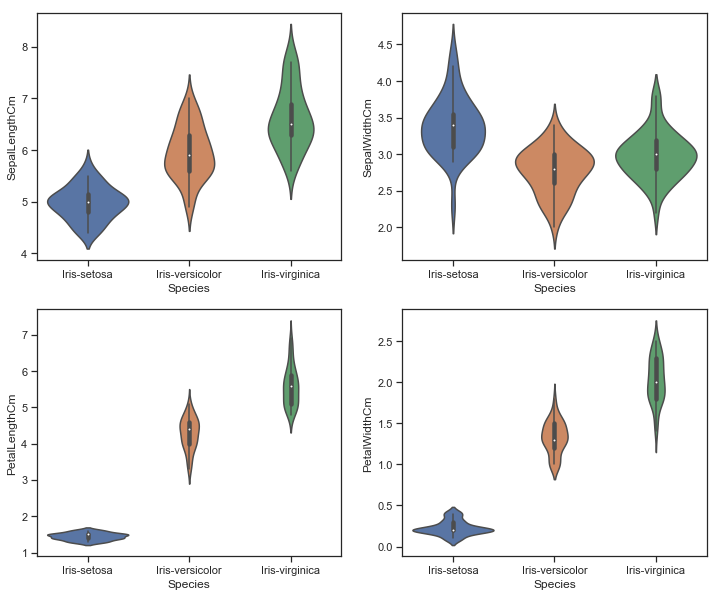

In [318]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.violinplot(x = iris["Species"],  y = iris["SepalLengthCm"],data=iris )
plt.subplot(2,2,2)
sns.violinplot(x = iris["Species"],  y = iris["SepalWidthCm"] ,data=iris)
plt.subplot(2,2,3)
sns.violinplot(x = iris["Species"],  y = iris["PetalLengthCm"],data=iris )
plt.subplot(2,2,4)
sns.violinplot(x = iris["Species"],  y = iris["PetalWidthCm"] ,data=iris)


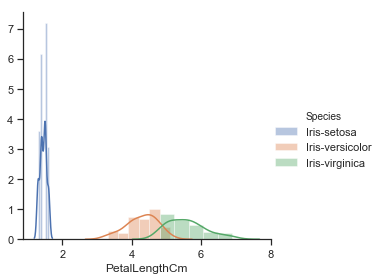

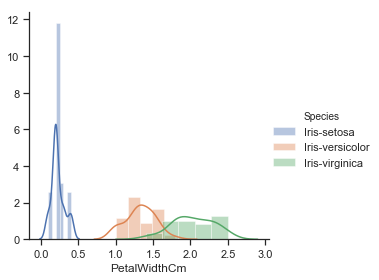

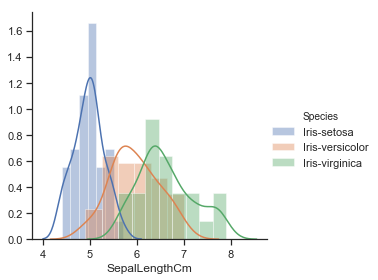

In [319]:

sns.FacetGrid(iris,hue="Species",size=4).map(sns.distplot,"PetalLengthCm").add_legend()
sns.FacetGrid(iris,hue="Species",size=4).map(sns.distplot,"PetalWidthCm").add_legend()

sns.FacetGrid(iris,hue="Species",size=4).map(sns.distplot,"SepalLengthCm").add_legend()
plt.show()

### Finding  optimum number of clusters for K Means Algorithm

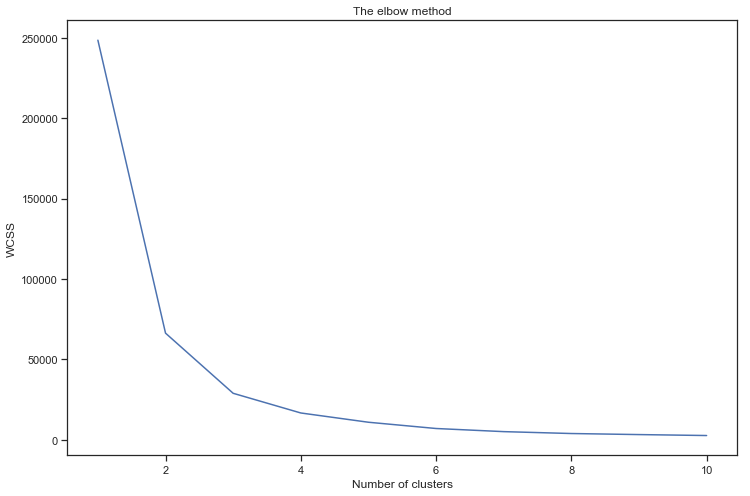

In [320]:
# Finding the optimum number of clusters for k-means classification
x = iris.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.figure(figsize=(12,8))
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')                        # Within cluster sum of squares
plt.show()

#### From Above plot using  'The elbow method' , the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

#### Thus from above we  select the number of clusters as K=3.

## Applying KMeans classifier

In [321]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


### Visualizing clusters

In [322]:
kmeans.cluster_centers_

array([[ 74.        ,   5.93877551,   2.78571429,   4.23061224],
       [125.36      ,   6.604     ,   2.98      ,   5.544     ],
       [ 25.07894737,   4.97631579,   3.38684211,   1.45      ]])

In [323]:
 kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [324]:
labels=kmeans.labels_
lclust=iris.assign(clusters=labels)
lclust.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,clusters
145,146,6.7,3.0,5.2,2.3,Iris-virginica,1
146,147,6.3,2.5,5.0,1.9,Iris-virginica,1
147,148,6.5,3.0,5.2,2.0,Iris-virginica,1
148,149,6.2,3.4,5.4,2.3,Iris-virginica,1
149,150,5.9,3.0,5.1,1.8,Iris-virginica,1


###  Predicting  a random value

In [325]:
# to call the predict method with a set of data points
kmeans.predict([[ 5.1, 3.5, 1.4, 0.2 ],
     [ 5.9, 3.0, 5.1, 1.8 ]])


array([2, 2])

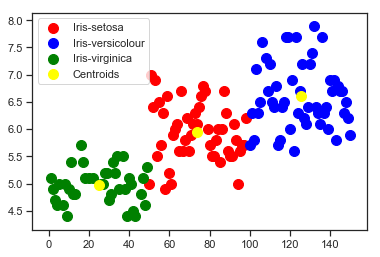

In [326]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()